#### Adaboost

In [1]:
import os
import pandas as pd

path = r'D:\elice_python\GAS_5\pytest_machine'

os.chdir(path)

In [2]:
data = pd.read_csv('tree.csv', header=0)
print(data.shape)
print(data.head(3))

X = data.iloc[:,:-1]
y= data.iloc[:,-1]
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

(100, 3)
      x1     x2    y
0  1.880  0.568  1.0
1  0.369 -0.349  1.0
2  0.965  0.109  0.0
(100, 2) (100,)


In [3]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, random_state=0)
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.92


c:\Users\Caelu\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### Gradient Boost

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.92


num_of_feature : 2


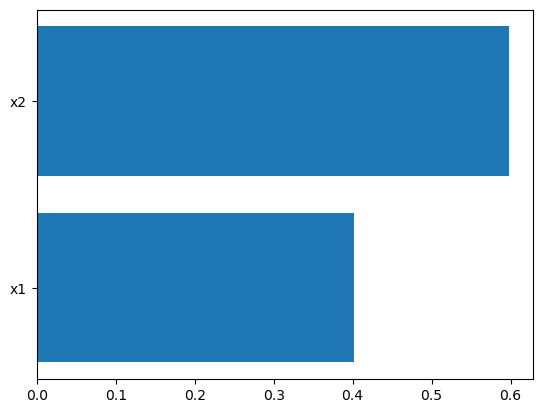

In [5]:
import matplotlib.pyplot as plt
import numpy as np

n_features = X_train.shape[1]
print('num_of_feature :', n_features)

plt.barh(np.arange(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), labels=X_train.columns)
plt.show()

#### 히스토그램 기반 부스팅 실습

In [6]:
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.92
0.84


#### XGBoost 실습

In [11]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100)
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.92


num_of_feature : 2


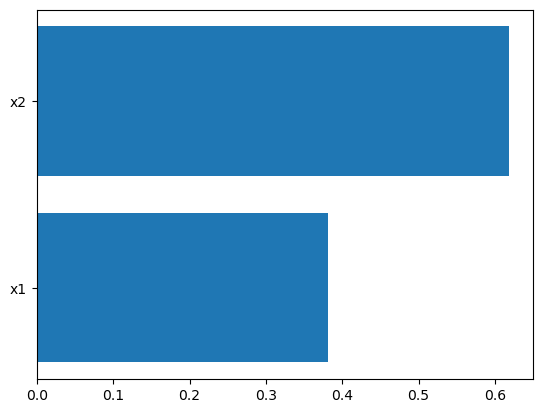

In [8]:
import matplotlib.pyplot as plt
import numpy as np

n_features = X_train.shape[1]
print('num_of_feature :', n_features)

plt.barh(np.arange(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), labels=X_train.columns)
plt.show()

## LightGBM
- XGBoost처럼 병렬 처리를 수행한다.
- 그러나 학습에 걸리는 시간이 훨씬 적고 메모리 사용량도 적다. (binning 수행)
  ![[Pasted image 20240715120539.png]]
- 기존 모델들은 최대한 균형 잡힌 트리를 유지하면서 분할하여 트리의 깊이를 최소화하려 하지만, 
  **리프 중심 트리 분할(Leaf Wise) 방식**으로 깊이가 비대칭인 트리를 생성한다. (분류에 초첨)

- 최대 손실값을 가지는 리프 노드를 계속 분할해 생성되는 비대칭 기반의 트리는 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다.
- 10,000건 이상의 데이터에서 좋은 성능을 보인다.

- Scikit-learn에 포함되어 있지 않으므로 별도로 설치해야 한다. (Colab에서는 이미 설치)
- `conda install -c anaconda lightgbm` 또는 `pip install lightgbm`

In [9]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=100)
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

[LightGBM] [Info] Number of positive: 38, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506667 -> initscore=0.026668
[LightGBM] [Info] Start training from score 0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

num_of_feature : 2


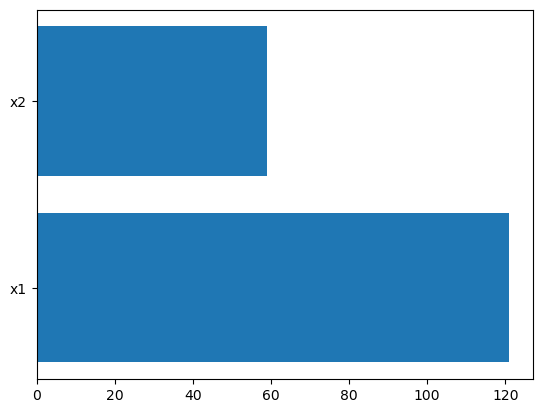

In [10]:
import matplotlib.pyplot as plt
import numpy as np

n_features = X_train.shape[1]
print('num_of_feature :', n_features)

plt.barh(np.arange(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), labels=X_train.columns)
plt.show()